# CS-5600/6600 Lecture 14 - Linear Models

**Instructor: Dylan Zwick**

*Weber State University*


<center>
  <img src="
https://imgs.xkcd.com/comics/curve_fitting.png" alt="Curve Fitting">
</center>

Let's first import our standard libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import csv

We're going to be building linear models today, so let's also import the linear regression class from sklearn, and a couple others we'll use towards the end of the lecture.

In [2]:
from sklearn.linear_model import LinearRegression #Import the linear regression class
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

##Linear Regression

Today we're going to discuss linear models - specifically linear regression. This is one of the oldest and most established methods for predictive modeling, and it's a bit unusual to introduce it about half way through the class. It's usually introduced much earlier.

Basically, the assumption behind a linear model is there is a *linear relation* between your features and your prediction. This will be explained in more detail below, but please note that linear models encompass more than just linear regression. In fact, polynomial regression is also a type of linear model.

The earliest form of "regression" was the "method of least squares", which was published by Legendre in 1805 and by Gauss in 1809. Both applied the method to the problem of determining the orbits of bodies about the sun based on astronomical observations.

The idea behind simple linear regression is that you want to predict a quantitative response $Y$ on the basis of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$. Mathematically, we can write this as:

&nbsp;
<center>
$Y \approx \beta_{0} + \beta_{1}X$,
</center>
&nbsp;

where $\beta_{0}$ and $\beta_{1}$ are the _intercept_ and _slope_ terms, called the model parameters (or coefficients), which we're trying to learn based upon our data. We will sometimes describe this by saying we are _regressing_ $Y$ on $X$. Once we have this model, then for any new input value $x$, we can use the model to predict the new output value $y$.

<center>
  <img src="https://drive.google.com/uc?export=view&id=1jYkZ8bkKuBypEwRntNEUHVLmIKGNYOmI" alt="Simple Linear Regression">
</center>

As a more specific example, suppose we've got a dataset of movies, and for each movie we have some "score" provided by reviews from professional critics, and then another "score" provided by a more general audience, perhaps from online voting. We might want to try to build a model predicting the audience score from the critics score using linear regression, and it might look something like this:

<center>
  <img src="https://drive.google.com/uc?export=view&id=1nCqo-Py_WzzR7IgJ3wY9l6V2ZC-5Cx3c" alt="Audience Score vs. Critics Score">
</center>



In practice, of course, what we need to do is estimate $\beta_{0}$ and $\beta_{1}$, and we do this with our data. We assume we have a data set with inputs and outputs:

&nbsp;
<center>
$(x_{1},y_{1}), (x_{2},y_{2}), \ldots, (x_{n},y_{n})$
</center>
&nbsp;

and we want to find the values of $\beta_{0}$ and $\beta_{1}$ that make our predicted values $Y(x_{i}) = \hat{y}_{i}$ as close to the actual values $y_{i}$ as possible. How do we define "close"? Well, there are a number of ways, but by far the most common is the sum of squares error:

<center>
  $\displaystyle \sum_{i = 1}^{n}(y_{i}-\hat{y}_{i})^{2}$.
</center>

The least squares approach chooses $\beta_{0}$ and $\beta_{1}$ to minimize the sum of squares error - in other words it is the _least squares coefficient estimate_, and it's a moderately involved but straightforward multivariable calculus problem to prove that the coefficients that satisfy this requirement are:

&nbsp;
<center>
    $\displaystyle \beta_{1} = \frac{\sum_{i = 1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i = 1}^{n}(x_{i}-\bar{x})^{2}}$,
</center>
&nbsp;
<center>
    $\displaystyle \beta_{0} = \bar{y} - \beta_{1}\bar{x}$.
</center>

Here $\bar{x}$ and $\bar{y}$ are the respective average values of the $x$ and $y$ observations.

OK, so now we have the line that minimizes the squared error. It's the "best" line we can find. But, how good is it? That is to say, how well does this line actually do at modeling the data? Is there an "objective" way to measure this?

Well, one way to measure how good the fit is would be to calculate the sum of squares error. This is called the "residual sum of squares", and is equal to:

<center>
    $\displaystyle RSS = \sum_{i = 1}^{n}(y_{i}-\hat{y}_{i})^{2}$
</center>

Here the $\hat{y}_{i}$ terms are the predictions.

An issue here is that this number will naturally get larger with more observations, and so we'd like a way to normalize this relative to the number of observations. This is called the "residual squared error" and is given by:

<center>
    $\displaystyle RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i = 1}^{n}(y_{i}-\hat{y}_{i})^{2}}$.
</center>

Why divide by $n-2$? Well, the deviration would take a minute, but you can view it as the difference between the number points required to specify our dataset, which is $n$, and the number of points required to specify our line, which is $2$.

Now, this is a decent measurement of the accuracy of our model, but it still has a problem. It depends on the scaling of the data. For example, if we switched to measuring distances in centimeters and not meters, the actual numeric value calculated here would be 100 times greater, even though the model didn't change. So, a numeric value here doesn't have much meaning unless you're comparing it against other values with the same scaling. This can be overcome with the _$R^{2}$ statistic_.

The $R^{2}$ statistic is a proportion, is always between $0$ and $1$ (for a regression model), and is independent of the scale of your measurements. It comes from the formula:

&nbsp;
<center>
    $\displaystyle R^{2} = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i = 1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i = 1}^{n}(y_{i}-\bar{y})^{2}}$.
</center>
&nbsp;

Here, $TSS$ is the _total sum of squares_ and represents the variance in the response $Y$ independent of $X$. The $R^{2}$ statistic measures what proportion of this variance can be explained by the predictive variable $X$. If there is no relation ($X$ provides no predictive power), then $R^{2}$ will be $0$. If $X$ perfectly preficts $Y$, then $R^{2}$ will be equal to $1$.

__WARNING__ - While the $R^{2}$ value is a reasonable measure for the effectiveness of a linear model, don't become complicit and let it take the place of an investigation of your data. You should always chart your data and look at the relationship to see if a linear model might make sense. A famous illustrative example here is [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), named after the stastician Francis Anscombe, who constructed it in 1973. It's pictured below.

<center>
  <img src="https://drive.google.com/uc?export=view&id=1-yLnc_BLUkaMWbBUL-ql88OEyjPQV2Wj" alt="Anscombe Quartet">
</center>

These are four distributions with identical means and variances for their independent ($X$) and dependent ($Y$) variables, the same regression lines, and the same $R^{2}$ statistics. They are, however, obviously _very_ different distributions, and it's only the first that really makes sense for a simple linear regression model.

_Lesson_ - a calculated statistic can be useful, but it can also lull you into a false sense of certainly and confidence which can embarass you if you don't first and foremost understand your data.

###The Galton Heights Dataset

Let's return to the Galton heights dataset we introduced in our last lecture, and try to do what the dataset was originally meant to do - predict the heights of the children from the (averaged) heights of the parents.

First, we'll grab the data:

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=view&id=1fJoQp6ho1rkhuZUBNd39ThUMOCheDOD0')
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


Next, we'll convert the midparent height to our independent ($X$) variable, and the child height to our dependent ($y$) variable.

In [5]:
X = df[['midparentHeight']].to_numpy() #Input values
y = df['childHeight'].to_numpy() #Output values

We can plot the child heights relative to the midparent heights in a scatterplot to see if there's a correlation.

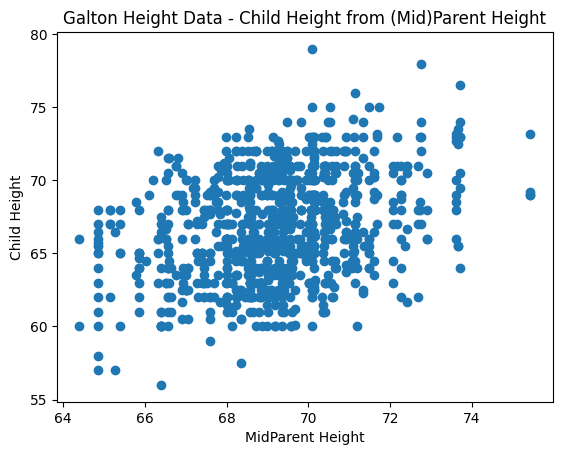

In [6]:
# Create scatter plot
plt.scatter(X, y)

# Add title and labels
plt.title('Galton Height Data - Child Height from (Mid)Parent Height')
plt.xlabel('MidParent Height')
plt.ylabel('Child Height')

# Show plot
plt.show()

Yeah, it looks like there's a bit of a correlation, but honestly not much. Let's calculate the regression line.

Slope: 0.637
Intercept: 22.636
R-squared: 0.10300883578346631


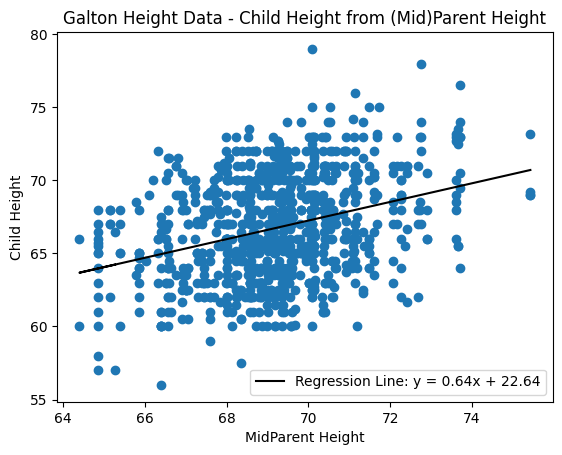

In [8]:
slr = LinearRegression()

slr.fit(X,y) #Fit the linear regression model to the data

print(f'Slope: {slr.coef_[0]:.3f}')

print(f'Intercept: {slr.intercept_:.3f}')

r_squared = slr.score(X,y)
print(f'R-squared: {r_squared}')

# Create scatter plot
plt.scatter(X, y)

# Plot the regression line
plt.plot(X, slr.coef_[0] * X + slr.intercept_, color='black', label=f'Regression Line: y = {slr.coef_[0]:.2f}x + {slr.intercept_:.2f}')

# Add title and labels
plt.title('Galton Height Data - Child Height from (Mid)Parent Height')
plt.xlabel('MidParent Height')
plt.ylabel('Child Height')
plt.legend()

# Show plot
plt.show()

That's not a particularly great $R^{2}$ score, and that the slope is a fair bit below $1$ is the original of the term "regression". Children "regress" towards the mean, or as Galton called it, "regression towards the "*mediocre*".

### The Ames Housing Data

Alright, let's take a look at a simple linear regression model but with multiple input features. In particular, the Ames Housing dataset. It's a dataset of home features and home prices from Ames, Iowa. For more information on this dataset, you can check out:

[A report describing the dataset](https://jse.amstat.org/v19n3/decock.pdf)

[Detailed documentation regarding the dataset's features](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

The features we will be working with are:

* **Overall Qual**: Rating for the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent)
* **Overall Cond**: Rating for the overall condition of the house on a scale from 1 (very poor) to 10 (excellent)
* **Gr Liv Area**: Above grade (ground) living area in square feet
* **Central Air**: Central air conditioning (N = no, Y = yes)
* **Total Bsmt SF**: Total square feet of the basement area
* **SalePrice**: Sale price is U.S. dollars (This is the target variable a.k.a. the value we want to predict)

So, let's load those columns from the dataset.

In [10]:
#Specify the columns we plan to use
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

#Import the housing data, specifying it as tab separated ('\t'), and specifying to import the columns we plan to use.
df = pd.read_csv('https://drive.google.com/uc?export=view&id=1cHQfFy06Tkv9fcotvySIq9AebUJ2cNUW', usecols=columns)

#Investigate the first five rows of our dataframe
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [11]:
#We can find out the number of rows in our dataframe using the shape command
df.shape

(2930, 6)

Before we do some modeling, we'll want to do a bit of data wrangling. First, we'll want to convert that "Central Air" column from string values "Y" and "N" to numeric values 0 and 1, which we can do using the .map method.

In [12]:
df['Central Air'] = df['Central Air'].map({'N':0,'Y':1})

In [13]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


We should also check whether any of the data frame columns contain missing values.

In [14]:
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,1
Central Air,0
Gr Liv Area,0
SalePrice,0


It looks like we're missing one ane only one value - the basement square footage for some house. As we've got information about 2930 houses, we can probably make do with information about 2929 houses, and so we can drop the row with the null value.

In [15]:
df = df.dropna() #There is an 'axis' variable here that drops rows if it's 0 and columns if it's 1. Default rows.
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,0
Central Air,0
Gr Liv Area,0
SalePrice,0


Before we create our model, let's do some exploratory data analysis (EDA). In particular, let's look at a new visualization tool that extends upon the scatterplots we saw last time - the *scatterplot matrix*, which will produce a scatterplot of each of the variables relative to each other. This lets us visualize the pair-wise correlation between the different features in this dataset.

Pandas provides a nice tool for creating a scatterplot matrix:

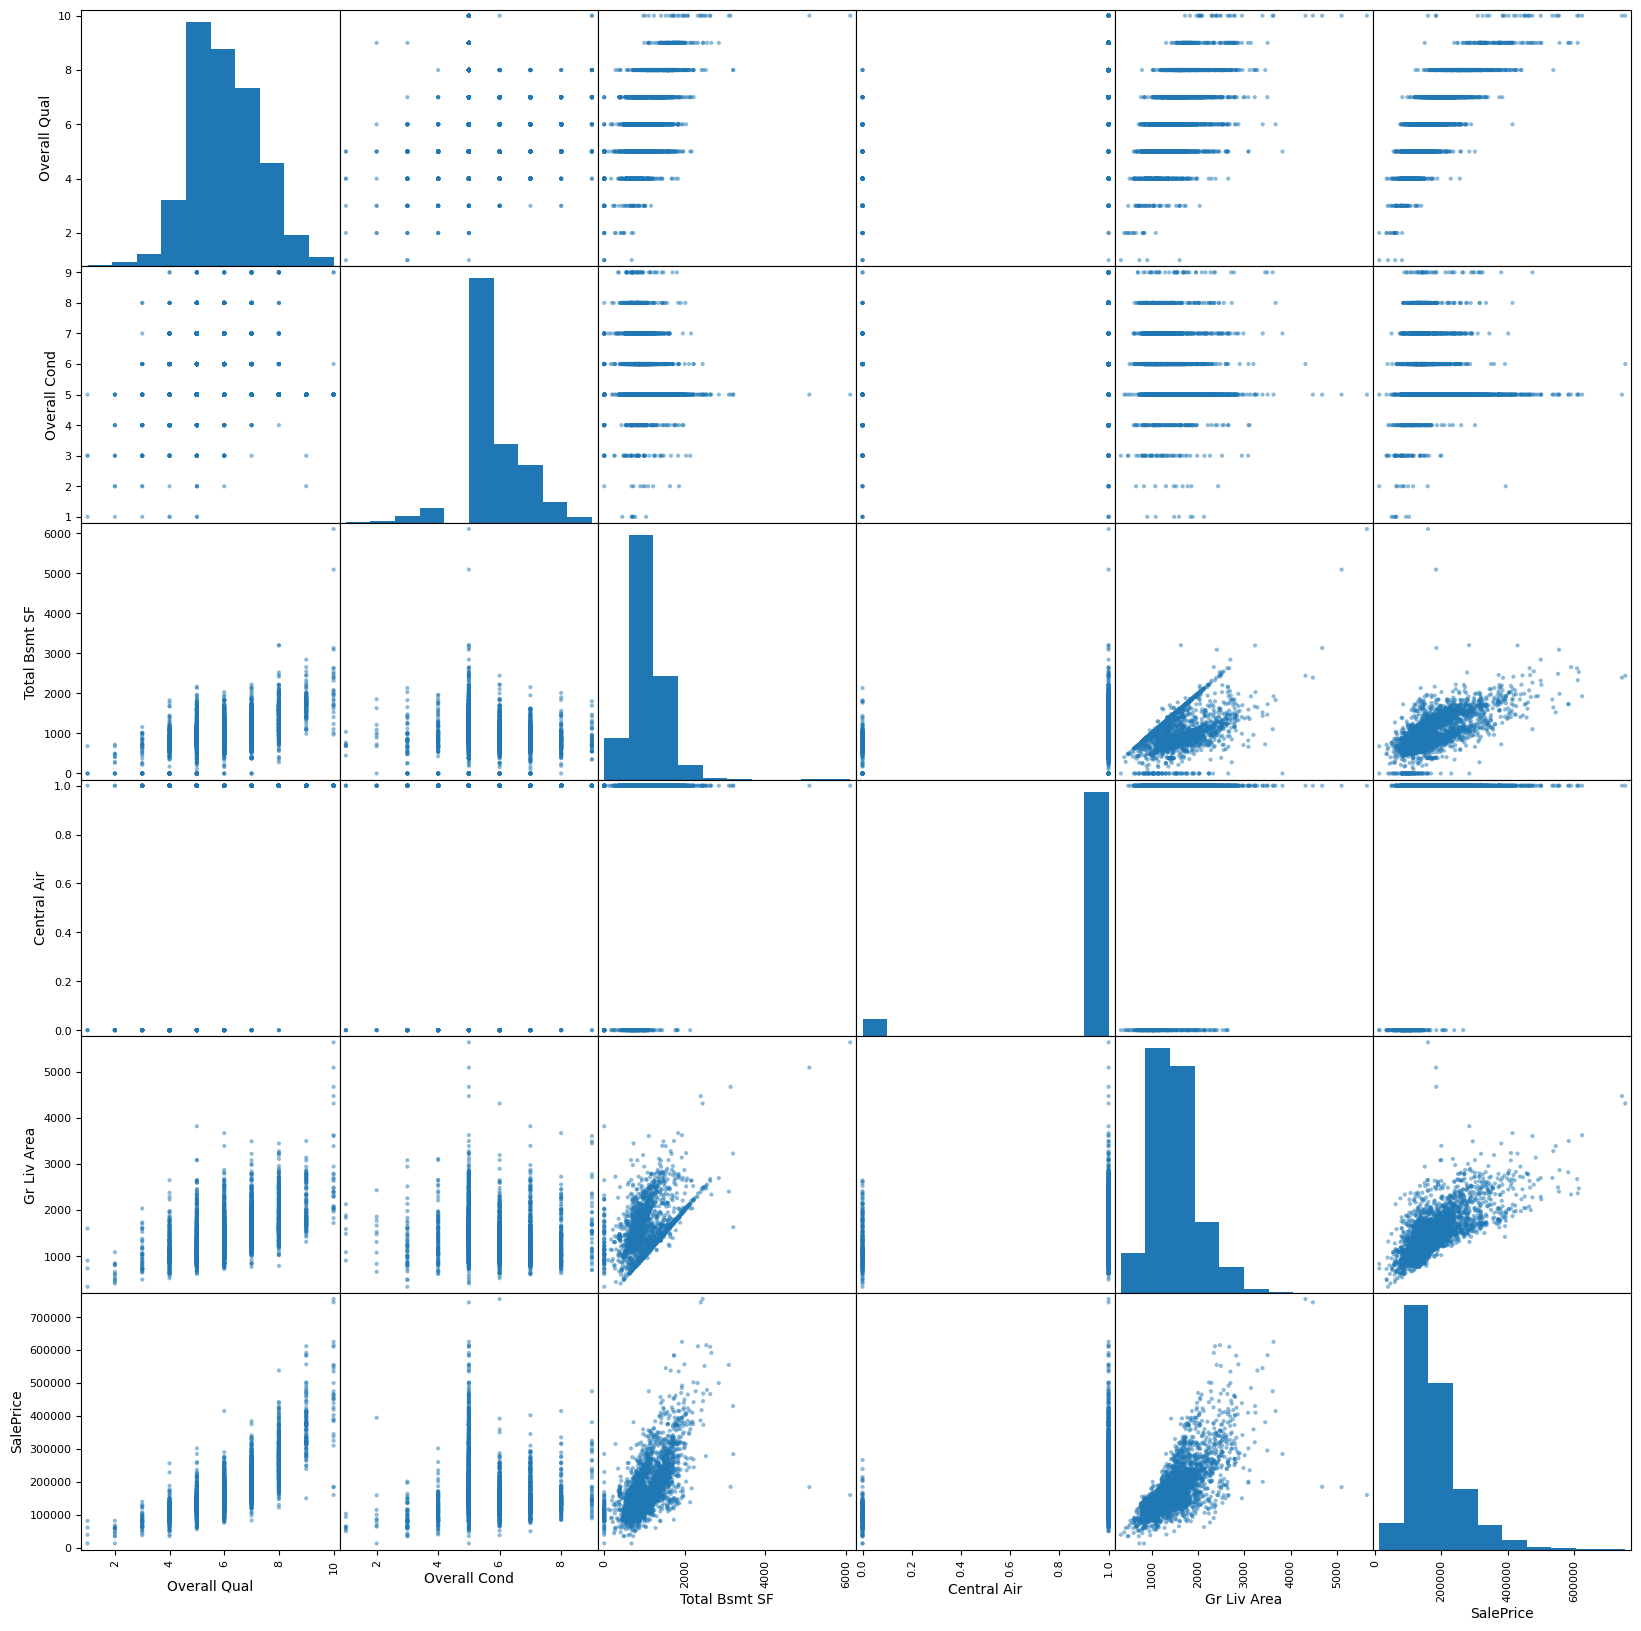

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20))
plt.show()

Taking a look at these scatterplots, I'd say the most promising candidate for a simple linear regression model predicting sale price will be based on Gr Liv Area. Let's try it.

In [17]:
X = df[['Gr Liv Area']].values #Input values
y = df['SalePrice'].values #Output values

slr = LinearRegression()

slr.fit(X,y) #Fit the linear regression model to the data

print(f'Slope: {slr.coef_[0]:.3f}')

print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


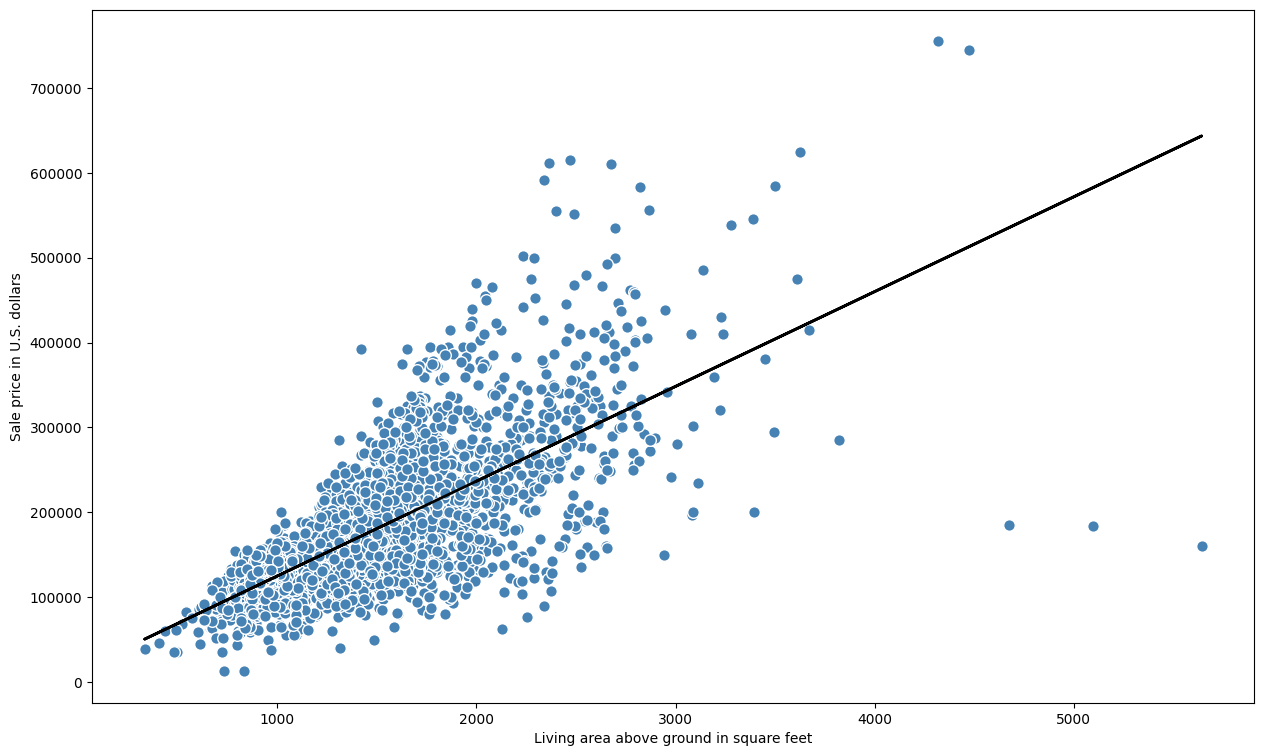

In [18]:
plt.figure(figsize=(15,9))
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70)
plt.plot(X,slr.predict(X), color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

So that's basic single-variable linear regression. We attempt to predict an output variable $Y$, based on an input variable $X$, and our model assumes the relationship between $X$ and $Y$ is of the form:

&nbsp;
<center>
$Y = \beta_{0} + \beta_{1}X$
</center>
&nbsp;

Well, as you might imagine, the world isn't always so simple, and frequently (almost always) there are multiple input factor that affect the output you're wanting to predict. We can take into account multiple factors with _multiple linear regression_, where our model still assumes a linear relationship between the inputs and the outputs, but instead of being a line, it is a plane (if there are two inputs), or a "hyperplane" (if there are more than two inputs).

&nbsp;
<center>
    $Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \cdots \beta_{n}X_{n}$
</center>
&nbsp;

How are these coefficients $\beta_{0},\beta_{1},\ldots,\beta_{n}$ determined? Well, we can use the same approach as we used with simple linear regression - we can find the choice of coefficients that minimizes the residual sum of squares:

&nbsp;
<center>
    $\displaystyle \sum_{i = 1}^{m}(y_{i}-\hat{y}_{i})^{2} = \sum_{i = 1}^{m}(y_{i} - \hat{\beta}_{0} - \hat{\beta}_{1}x_{i1} - \hat{\beta}_{i2}x_{i2} \cdots - \hat{\beta}_{in}x_{in})^{2}$
</center>
&nbsp;

Here, $m$ is the number of data points, and $n$ is the number of input variables.

The formulas for calculating these coefficients exactly can be fairly involved, and we won't go over them (or even worse, DERIVE them), here, but know that exact formulas are known and can be used by computer systems. If the number of data points or the number of input variables is _huge_, then calculating these formulas exactly can be quite time consuming, and sometimes approximation methods like gradient descent (which we'll cover later) are used.

Let's see if we can use multiple linear regression to build a better model for predicting sale price than the single variable model we built above. This time, we'll use *all* our variables that aren't the dependent variables SalesPrice. (I bet you were wondering when we were going to use our transformation of the "Central Air" input.)

In [19]:
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values

slr.fit(X,y)

print(features)

print(f'Slope: {slr.coef_.round(3)}')

print(f'Intercept: {slr.intercept_:.3f}')

r_squared = slr.score(X,y)
print(f'R-squared: {r_squared}')

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area'],
      dtype='object')
Slope: [27330.677  1120.104    38.935 11509.833    52.655]
Intercept: -122656.819
R-squared: 0.7649318736980707


Alright! It looks like our model improved when we included all 5 variables.

Now, we're not limited to linear relationships - and in fact neither is the class of "linear models". We could instead have a polynomial model of the form:

&nbsp;
<center>
    $Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \cdots \beta_{d}X^{d}$,
</center>
&nbsp;

and find the values of the coefficients that minimize the residual sum of squares. This model will _always_ do better than a linear model on your training data, but it runs the risk of overfitting your data - particularly for higher degree polynomials. We'll talk much more about this later.

Note that we would actually _still_ call this a linear model? Why, because there are no non-linear interaction terms between the coefficients we're trying to estimate. There are no terms of, for example, the forms $\beta_{2}^{3}$ or $\beta_{1}\beta_{3}$.

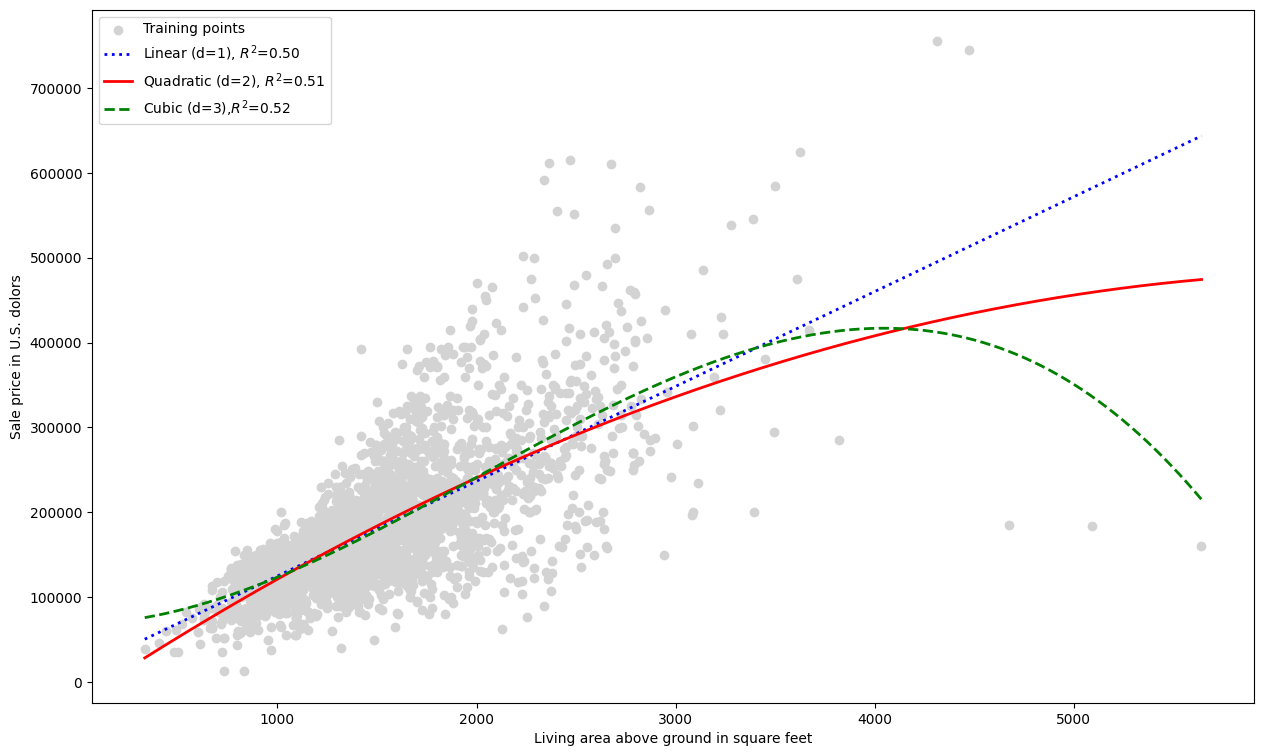

In [20]:
X = df[['Gr Liv Area']].values
regr = LinearRegression()

X_fit = np.arange(X.min()-1,X.max()+2,1)[:,np.newaxis]

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

plt.figure(figsize=(15,9))
plt.scatter(X,y,label='Training points', color = 'lightgray')
plt.plot(X_fit,y_lin_fit,label=f'Linear (d=1), $R^2$={linear_r2:.2f}',color='blue',lw=2,linestyle=':')
plt.plot(X_fit,y_quad_fit,label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',color='red',lw=2,linestyle='-')
plt.plot(X_fit,y_cubic_fit,label=f'Cubic (d=3),$R^2$={cubic_r2:.2f}',color='green',lw=2,linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dolors')
plt.legend(loc='upper left')
plt.show()

OK, it looks like this one is getting skewed by those outliers. What if we take them out?

In [21]:
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

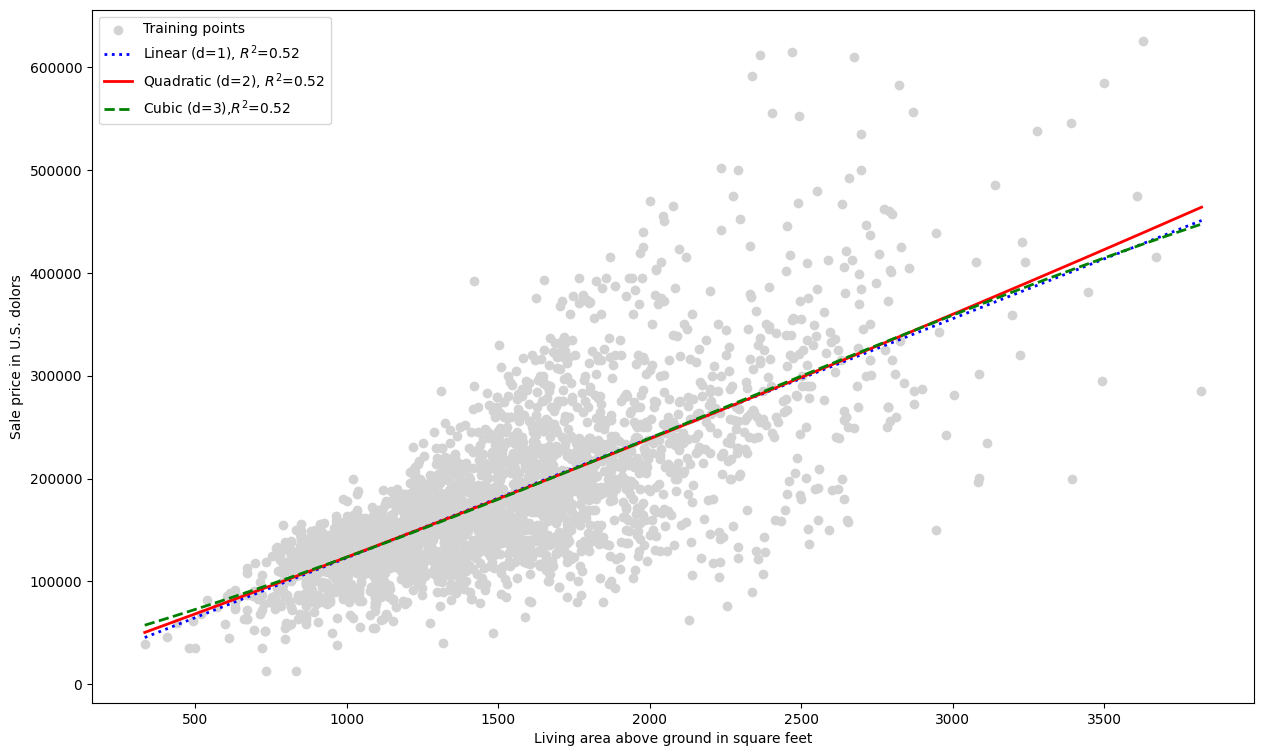

In [22]:
X_fit = np.arange(X.min()-1,X.max()+2,1)[:,np.newaxis]

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

plt.figure(figsize=(15,9))
plt.scatter(X,y,label='Training points', color = 'lightgray')
plt.plot(X_fit,y_lin_fit,label=f'Linear (d=1), $R^2$={linear_r2:.2f}',color='blue',lw=2,linestyle=':')
plt.plot(X_fit,y_quad_fit,label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',color='red',lw=2,linestyle='-')
plt.plot(X_fit,y_cubic_fit,label=f'Cubic (d=3),$R^2$={cubic_r2:.2f}',color='green',lw=2,linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dolors')
plt.legend(loc='upper left')
plt.show()

Looks like the quadratic and polynomial models don't deviate much from the linear model. Is this the case with all our variables? Let's take a look at the "overall quality" measure.

In [23]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values

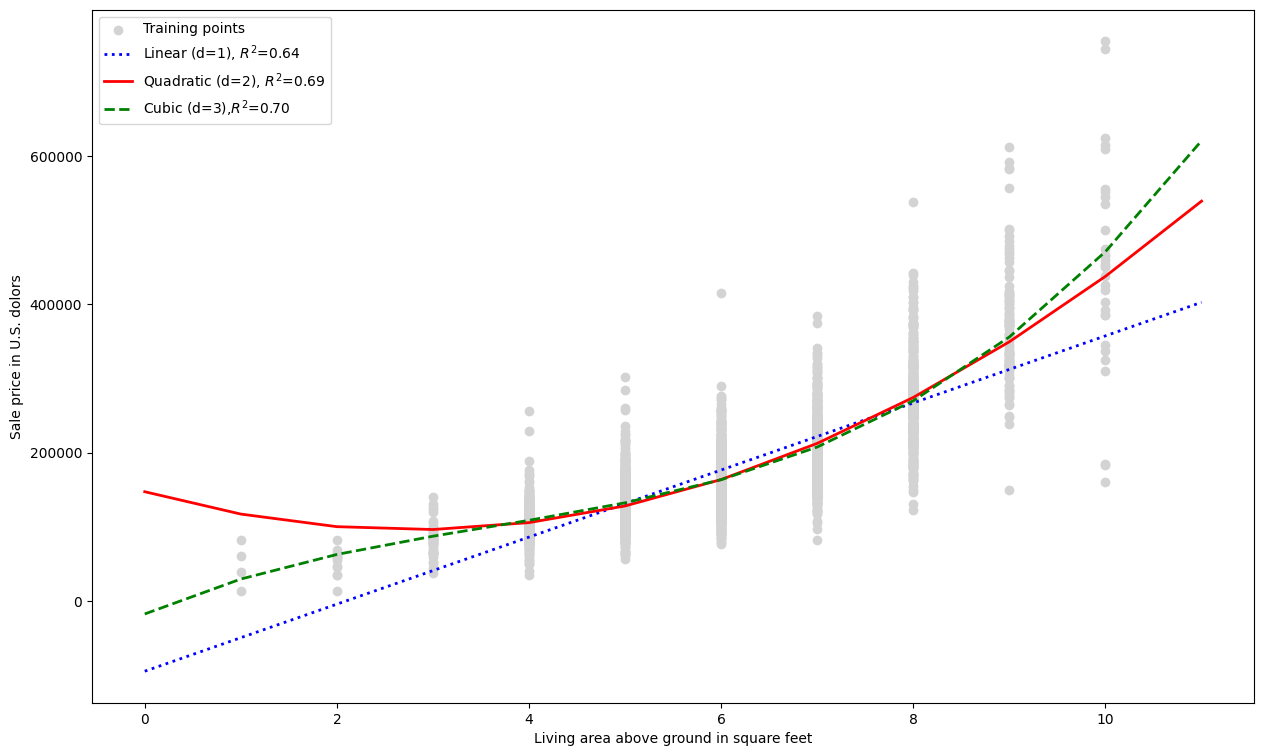

In [24]:
X_fit = np.arange(X.min()-1,X.max()+2,1)[:,np.newaxis]

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

plt.figure(figsize=(15,9))
plt.scatter(X,y,label='Training points', color = 'lightgray')
plt.plot(X_fit,y_lin_fit,label=f'Linear (d=1), $R^2$={linear_r2:.2f}',color='blue',lw=2,linestyle=':')
plt.plot(X_fit,y_quad_fit,label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',color='red',lw=2,linestyle='-')
plt.plot(X_fit,y_cubic_fit,label=f'Cubic (d=3),$R^2$={cubic_r2:.2f}',color='green',lw=2,linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dolors')
plt.legend(loc='upper left')
plt.show()

OK. Here it looks like a higher order polynomial might actually be a better fit.

Technically, if we use more variables or higher order polynomials, we'll *always* get a better fit according to the $R^{2}$ metric. However, this isn't always what we want. How we can choose which variables to use and which degree polynomial to apply will be the subject of our next lecture, when we'll also dig into the concept of *overfitting* - a very important idea in predictive modeling.

##References

* Cool [Twitter thread](https://x.com/ryxcommar/status/1718432880831909939) on regression

* [Some things you (maybe) didn't know about linear regression](https://ryxcommar.com/2019/09/06/some-things-you-maybe-didnt-know-about-linear-regression/)